<a href="https://colab.research.google.com/github/chibuzorc/data_analysis/blob/main/Assignment2_cchukwu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/IT7103/Assignment 2/Automobile_data.csv')

In [30]:
# Show data information and the first few columns
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [31]:
# Replace '?' in data with NaN, not a number to avoid errors. There are some values with ? in the data
data.replace('?', np.nan, inplace=True)

In [32]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
# Convert specific columns to numeric
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [34]:
# Drop rows with any NaN values
data.dropna(inplace=True)

In [35]:
# List of columns to convert from float64 to int64
columns_to_convert = ['wheel-base', 'length', 'width', 'height', 'bore', 'stroke',
                      'compression-ratio', 'horsepower', 'price']

# Convert specified columns to int64
data[columns_to_convert] = data[columns_to_convert].astype(int)

In [36]:
# Check column types and fix incorrect ones if necessary
print("Corrected data types after conversion:")
print(data.dtypes)


Corrected data types after conversion:
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base             int64
length                 int64
width                  int64
height                 int64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                   int64
stroke                 int64
compression-ratio      int64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [37]:
# Split the data 75% training and 25% testing
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

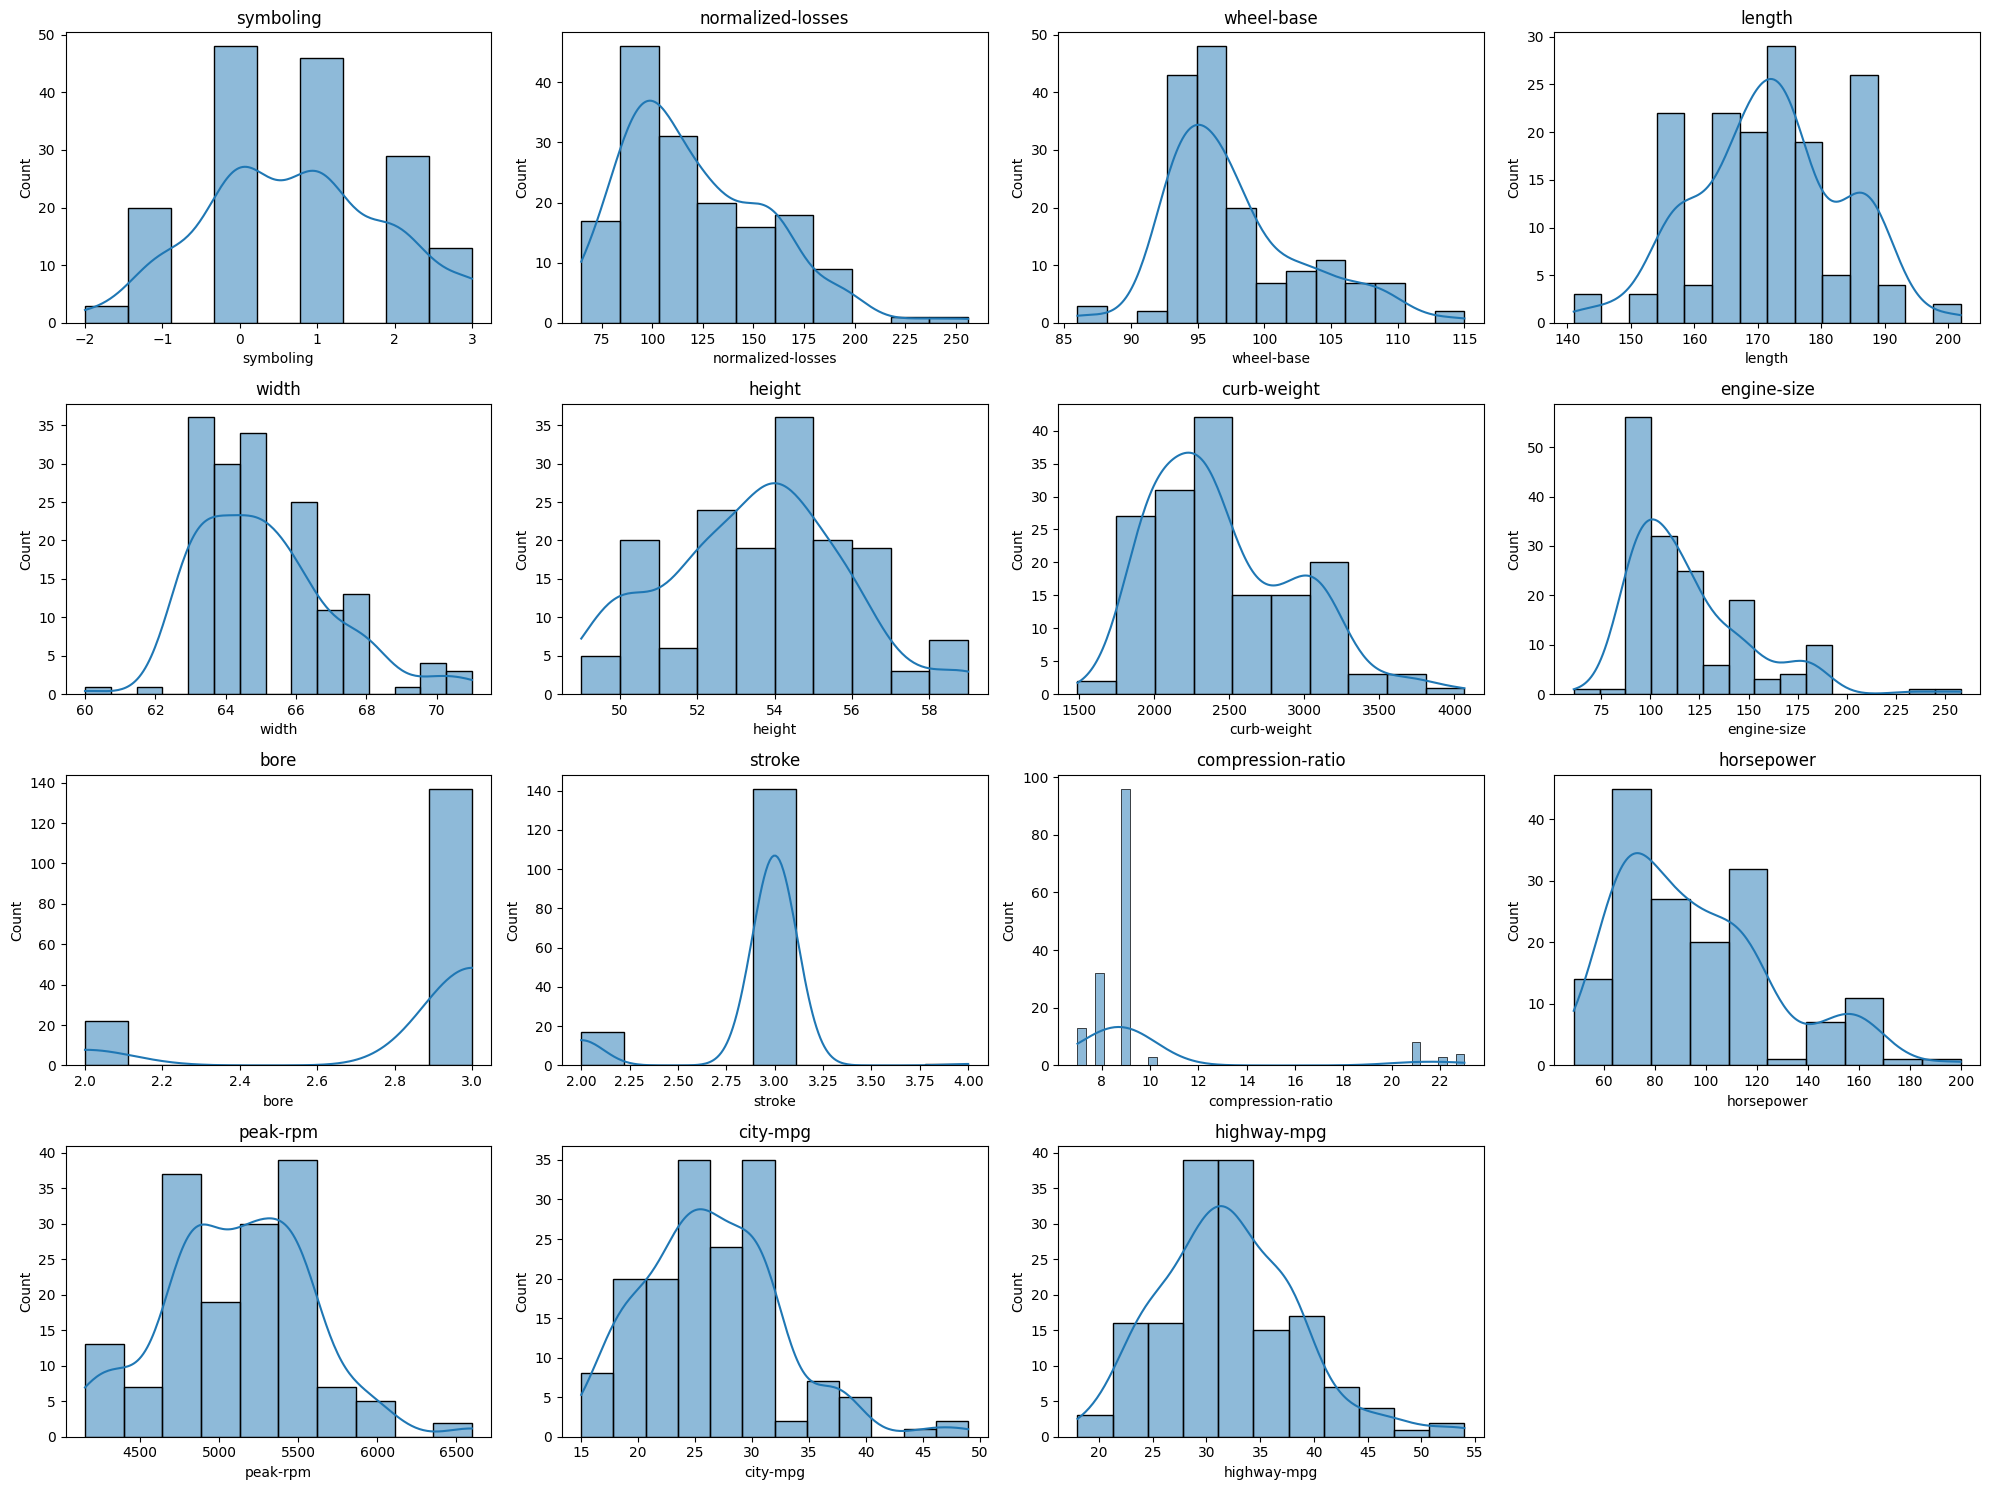

In [38]:
# Visualize necessary columns and categorize them
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(X[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
# Categorize columns based on distribution
symmetric_cols = ['wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'compression-ratio']
skewed_cols = ['horsepower']
categorical_cols = list(set(X.columns) - set(numeric_cols))

In [40]:
# Build the pipeline
numeric_symmetric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [41]:
# Combine all transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num_symmetric', numeric_symmetric_transformer, symmetric_cols),
        ('num_skewed', numeric_skewed_transformer, skewed_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [42]:
# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [43]:
# Fit and transform the training data
X_train_processed = pipeline.fit_transform(X_train)

In [44]:
# Transform the testing data
X_test_processed = pipeline.transform(X_test)

In [45]:
# Print the shape of the processed training and testing data
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed testing data:", X_test_processed.shape)

Shape of processed training data: (119, 56)
Shape of processed testing data: (40, 56)
